In [6]:
#%pip install numpy matplotlib
#Importamos las librerias necesirias
from functions import gaussianRandom as gss
from functions import merge_sort as mg
from functions import bubbleSort as bb
import matplotlib.pyplot as plt

In [7]:
data = gss(40000)

In [8]:
# Visualización de algunos valores
data[:10]

[-1.109102833604311,
 0.7704522809572443,
 -1.4264337075546796,
 -0.9409054822450127,
 -0.0670255330910609,
 -0.967085159614673,
 1.6853830304534085,
 0.5804451613450211,
 -0.5857963653272454,
 -1.4431811617931876]

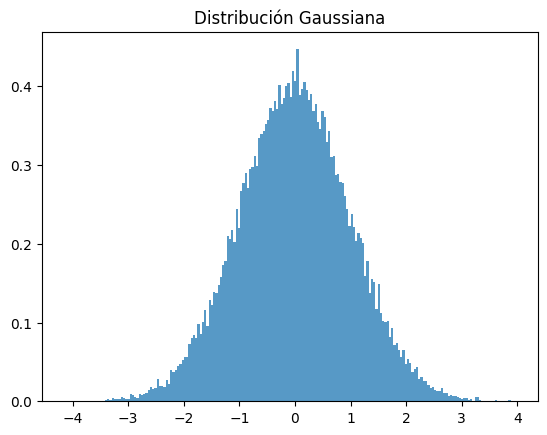

In [9]:
# Visualizar Gráficamente la distribución gaussiana
plt.hist(data, bins=200, density=True, alpha=0.75)
plt.title('Distribución Gaussiana')
plt.show()

In [10]:
mg(data)
data[:50]

[-4.148644551396774,
 -3.9027768269744167,
 -3.829577338604252,
 -3.7204418728833604,
 -3.5655206528729546,
 -3.5003415243267124,
 -3.499006345042927,
 -3.4147291342836503,
 -3.406367057374425,
 -3.3819242207427007,
 -3.3648776813677217,
 -3.364412191129918,
 -3.359047642064169,
 -3.3437708697278543,
 -3.3320641303683254,
 -3.3037646368226987,
 -3.2919503428342534,
 -3.289354792844018,
 -3.287624140159007,
 -3.2796574719633584,
 -3.2660383550227228,
 -3.2617457732848183,
 -3.255948843150979,
 -3.2534372122046933,
 -3.2408144105366965,
 -3.2198253807694392,
 -3.214849116020706,
 -3.1905922190143334,
 -3.1832953994901305,
 -3.1829721418619243,
 -3.1728899550018745,
 -3.1694318405695876,
 -3.1574804510439347,
 -3.1432374760568456,
 -3.138344060043473,
 -3.1349103750050835,
 -3.132053816483594,
 -3.127631398350479,
 -3.127409091627016,
 -3.1117699679805986,
 -3.103737406009808,
 -3.1002052350023837,
 -3.099757061225795,
 -3.086287387799353,
 -3.083658244763562,
 -3.0797540828982224,
 -3.07